# Plot maps of sea-ice drift speeds over the Arctic

In [1]:
# allow plots to be interactive in the notebook
%matplotlib notebook
import numpy as np
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
from pathlib import Path  
import sys
import xarray as xr
import matplotlib.colors as colors
import cartopy 
import cartopy.crs as ccrs
import pyproj
import matplotlib.gridspec as gridspec
import cmocean
import argparse
import locale 
import matplotlib.ticker as mticker

In [5]:
# open nextsim data

file_nextsim  = '/cluster/projects/nn9624k/rheinlender/breakup2013/data/wrf-exp/start_20130213_nudging/expt_01_wrf10/outputs-v11/'
ns = xr.open_dataset(file_nextsim + 'Moorings.nc')
ns

# plot ice flow

siu = ns['siu']*100 # in cm/s
siv = ns['siv']*100 # in cm/s

icespd = np.hypot(siu, siv)

cmap = cmocean.cm.speed

# Drift speed before breakup

<IPython.core.display.Javascript object>


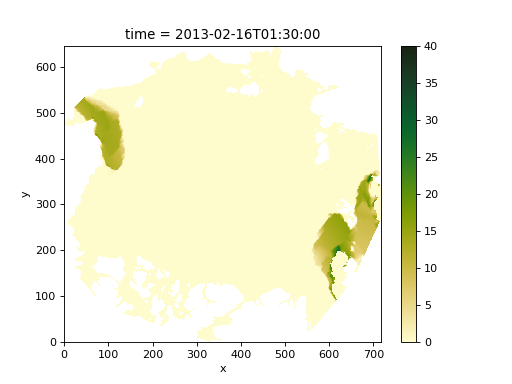

In [12]:
fig, ax = plt.subplots(1,1)
icespd.sel(time="16-02-2013")[0].plot.imshow(ax=ax, cmap=cmap, vmax=40, vmin=0)

# Drift speed AFTER breakup

<IPython.core.display.Javascript object>


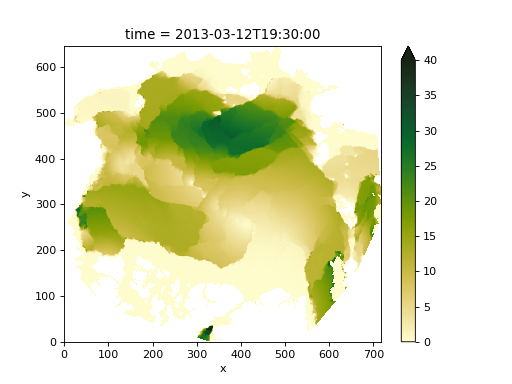

In [13]:
fig, ax = plt.subplots(1,1)
icespd[-1].plot.imshow(ax=ax, cmap=cmap, vmax=40, vmin=0)

# Time series of mean drift speed in the Arctic

<IPython.core.display.Javascript object>


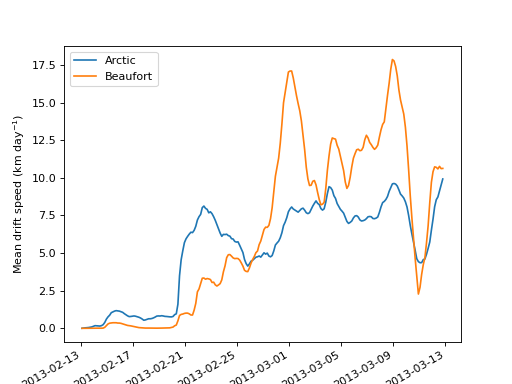

In [19]:
icespd_mean_Arctic = (icespd.mean(dim=('x','y'))*1e5)/(60*60*24)

# subset region: Beaufort Sea
x0=0; x1=260
y0=150; y1=410

icespd_mean_Beau = (icespd.sel(x=slice(x0,x1), y=slice(y0,y1)).mean(dim=('x','y'))*1e5)/(60*60*24)


fig, ax = plt.subplots(1,1)
icespd_mean_Arctic.plot(label='Arctic')
icespd_mean_Beau.plot(label='Beaufort')
ax.set_ylabel('Mean drift speed (km day$^{-1}$)' )
plt.legend()